In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [9]:
Google_news=pd.DataFrame()
for i in ['14','15','16','17','18','19','20','21','22','23','24']:
    data=pd.read_csv(f'Bitcoin_news_20{i}.csv')
    Google_news=pd.concat([Google_news,data])
Google_news=Google_news.reset_index()

Google_news = Google_news.rename(columns={'level_0': 'Head', 'level_1': 'link', 'level_2': 'Date', 'level_3': 'source',
                                                                               'Unnamed: 0': 'Ticker'})

In [10]:
Google_news=Google_news.drop_duplicates()

In [11]:
Google_news['Date'] = pd.to_datetime(Google_news['Date']).dt.date
Google_news=Google_news.sort_values(by=['Date'],ignore_index=True)

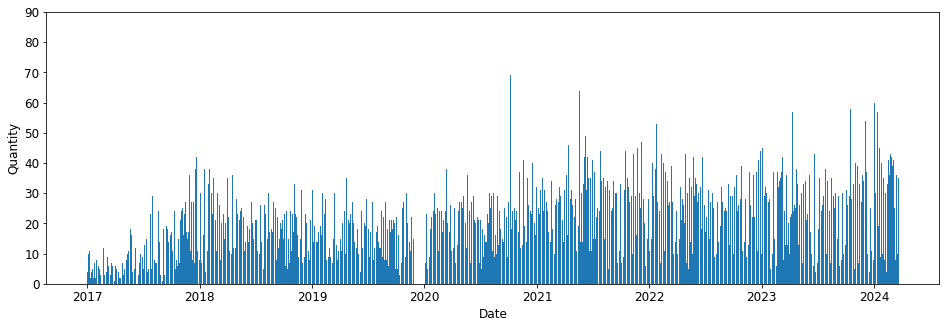

In [110]:
plt.figure(figsize=(16,5))

plt.rcParams['font.size'] = 12

plt.xlabel('Date')
plt.ylabel('Quantity')
plt.bar(Google_news['Head'].groupby(Google_news['Date']).count().index, 
        Google_news['Head'].groupby(Google_news['Date']).count().values)

ax = plt.gca()
ax.set_ylim([0, 90])

plt.savefig('general_news.png', bbox_inches='tight')
plt.show()

In [31]:
j=0
for i in list(Google_news['Head']):
    if 'Bitcoin' or 'bitcoin' or 'btc' or 'BTC' or 'crypto' in i:
        j=j+1
print('Всего ',len(Google_news) ,'новостей')
print((j/len(Google_news))*100,'% новостей содержат прямое упоминание биткойна или криптовалюты')

Всего  55409 новостей
100.0 % новостей содержат прямое упоминание биткойна или криптовалюты


In [32]:
source=[]
for i in list(Google_news['source']):
    start = i.rfind(':')+3
    end = i.rfind('}')-1
    source.append(i[start:end])
Google_news['source']=source

In [33]:
Google_news.head(5)

,Head,link,Date,source,Ticker
5203,What Will the Bitcoin Price Be in 2017? - Coin...,https://news.google.com/rss/articles/CBMiU2h0d...,2017-01-01,CoinDesk,BTC
5204,"A Look At Bitcoin Bubbles, When Will the Next ...",https://news.google.com/rss/articles/CBMiO2h0d...,2017-01-01,Bitcoin.com News,BTC
5205,"Bitcoin Price Tops $1,000 in First Day of 2017...",https://news.google.com/rss/articles/CBMiYWh0d...,2017-01-01,CoinDesk,BTC
5206,Bitcoin Breaks $1000 as Exchanges Break Volume...,https://news.google.com/rss/articles/CBMiW2h0d...,2017-01-01,Bitcoin.com News,BTC
5207,"Bitcoin Price Crosses $1,000 For The First Tim...",https://news.google.com/rss/articles/CBMiRGh0d...,2017-01-01,Fossbytes,BTC


In [121]:
words = ['Bitcoin','bitcoin','btc','crypto','Coin','coin','Bybit','Binance','Crypto','BTC','Blockchain','Block',
        '.io','Ethereum','ETH','cripto','blockchain','polygon','Cripto','Polygon', 'crypt']
sources=list(Google_news['Head'].groupby(Google_news['source']).count().index)
crypto_sources=[]
classic_sources=[]
for i in sources:
    count = 0
    for j in words:
        if j in i:
            count=+1
    if count > 0:
        crypto_sources.append(i)
    else:
        classic_sources.append(i)
        

In [123]:
marker=[]
for i in Google_news['source']:
    if i in crypto_sources:
        marker.append(1)
    else:
        marker.append(0)
Google_news['marker']=marker

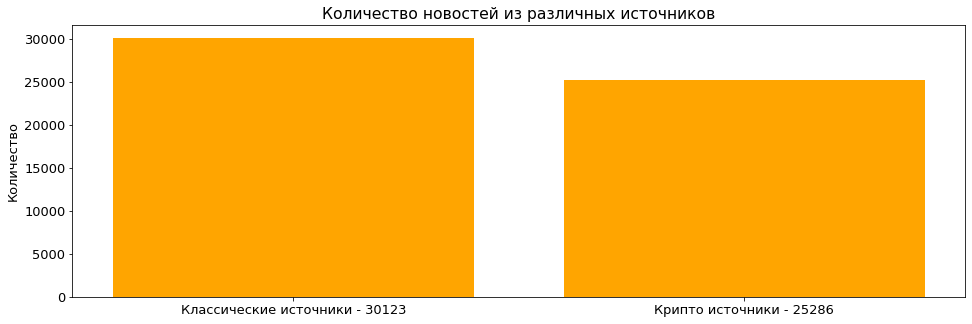

In [124]:
plt.figure(figsize=(16,5))
plt.locator_params(axis='x',nbins=2)

ax = plt.gca()
labels=['',f'Классические источники - {len(marker)-sum(marker)}',f'Крипто источники - {sum(marker)}']
ax.set_xticklabels(labels)

plt.title('Количество новостей из различных источников')
plt.ylabel('Количество')
plt.bar(Google_news['Head'].groupby(Google_news['marker']).count().index, 
        Google_news['Head'].groupby(Google_news['marker']).count().values, 
        color='orange')

plt.show()

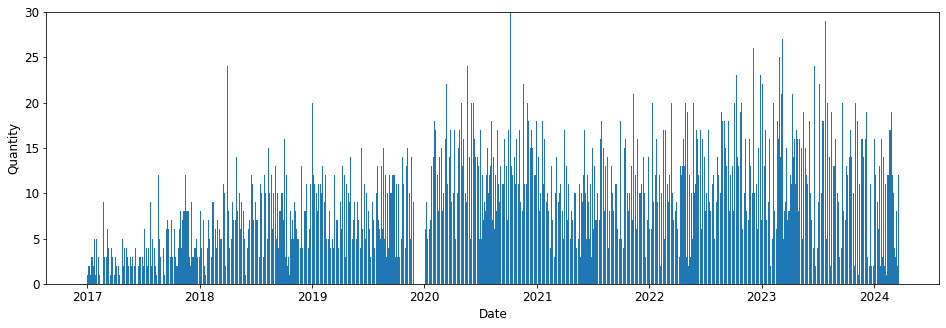

In [125]:
plt.figure(figsize=(16,5))

plt.rcParams['font.size'] = 12

plt.xlabel('Date')
plt.ylabel('Quantity')
plt.bar(Google_news[Google_news['marker']==1]['Head'].groupby(Google_news['Date']).count().index, 
        Google_news[Google_news['marker']==1]['Head'].groupby(Google_news['Date']).count().values)

ax = plt.gca()
ax.set_ylim([0, 30])

plt.savefig('crypto_news.png', bbox_inches='tight')

plt.show()

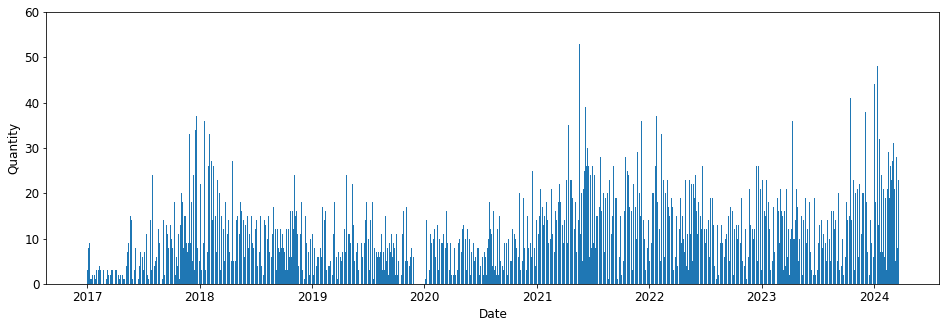

In [126]:
plt.figure(figsize=(16,5))

plt.rcParams['font.size'] = 12

plt.xlabel('Date')
plt.ylabel('Quantity')
plt.bar(Google_news[Google_news['marker']==0]['Head'].groupby(Google_news['Date']).count().index, 
        Google_news[Google_news['marker']==0]['Head'].groupby(Google_news['Date']).count().values)

ax = plt.gca()
ax.set_ylim([0, 60])

plt.savefig('classic_news.png', bbox_inches='tight')

plt.show()

In [127]:
Classic = pd.DataFrame(Google_news[Google_news['marker']==0]['Head'].groupby(Google_news['source']).count())
Top_20_classic = Classic.sort_values(by=['Head'],ascending=True).tail(20)


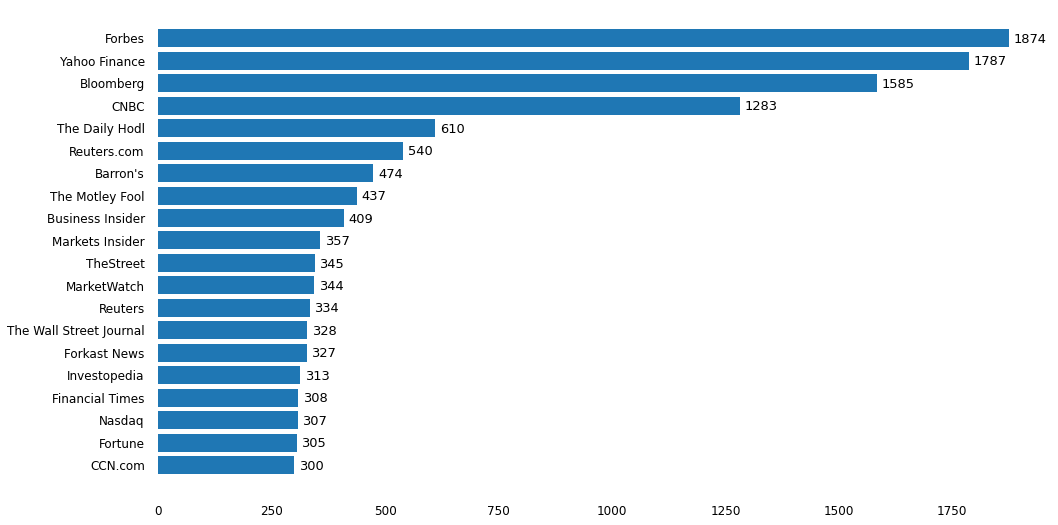

In [128]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(Top_20_classic.index, Top_20_classic['Head'].values)

plt.rcParams['font.size'] = 13

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add Plot Title
#ax.set_title('Top 20 classic news sources', )

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+10, i.get_y()+0.2, 
             str(round((i.get_width()), 2)),
             fontsize = 13,
             color ='black')

plt.savefig('classic_sources.png', bbox_inches='tight')

plt.show()

In [129]:
Crypto = pd.DataFrame(Google_news[Google_news['marker']==1]['Head'].groupby(Google_news['source']).count())
Top_20_crypto = Crypto.sort_values(by=['Head'],ascending=True).tail(20)

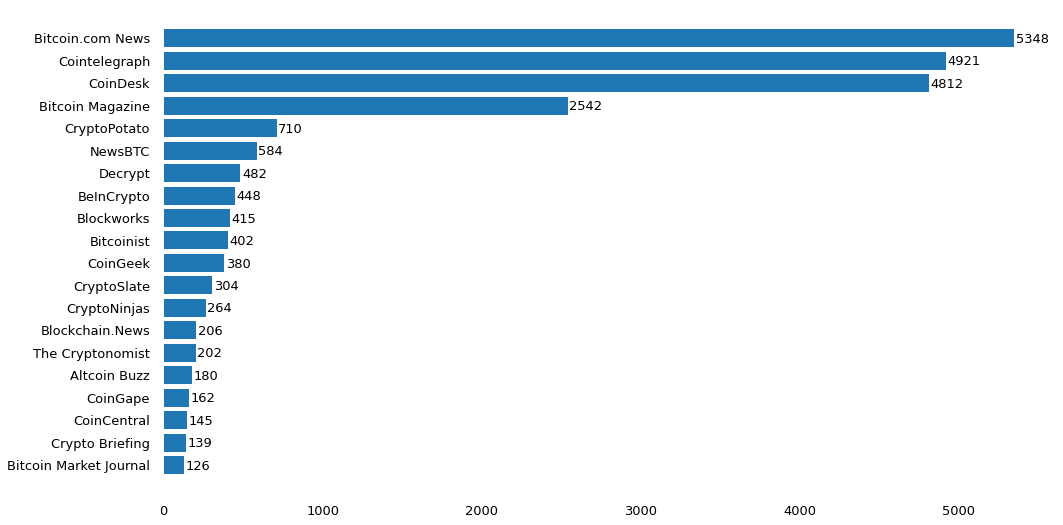

In [130]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(Top_20_crypto.index, Top_20_crypto['Head'].values)

plt.rcParams['font.size'] = 13

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add Plot Title
#ax.set_title('Top 20 crypto news sources', )


# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+10, i.get_y()+0.2, 
             str(round((i.get_width()), 2)),
             fontsize = 13,
             color ='black')

    
plt.savefig('crypto_sources.png', bbox_inches='tight')

plt.show()

In [46]:
Google_news.to_csv('Google_news.csv')